In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Elapsed", "Corrected", "Points", "Reg No.", "Reg Date"]
alternative_headings = ["HelmName", "Class", "PY", "SailNo", "Fleet", "Rank", "Place", "Points", "Reg No.", "Reg Date"]
fleets = ['Superfast', 'Fast', 'Medium', 'Slow']

plt.rcParams['figure.figsize'] = [20, 10]


def scrape_race(url):
    """Scrape all the results for a single race."""
    print(url)
    with urllib.request.urlopen(url) as response:
       html = response.read()
    
    soup = BeautifulSoup(html)
    
    tables = soup.findAll('table')
    return tables[:-1]


def get_dataframe_from(table):
    """Turn a table into a data frame."""
    table_rows = table.find_all('tr')
    columns = [th.text for th in table_rows[0].find_all('th')]
    l = []
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row = [tr.text.strip('\n') for tr in td]
        l.append(row)
    df = pd.DataFrame(l, columns=columns)
    
    return df
        

In [2]:
base_url = 'https://www.warsashsc.org.uk/results/'
series = ['wa', 'wb', 'wc', 'fa', 'fb', 'fc']

all_races_frames = []
race_on = []

for s in series:
    for i in range(1, 9):
        for j in ['09', '10', '11', '13', '15', '16', '17', '18']:
            try:
                race = scrape_race(base_url + j + s + str(i) + '.htm')

                for table in race:
                    df = get_dataframe_from(table)
                    df['Year'] = j
                    df['Day'] = s[0]
                    df['Series'] = s[1]
                    df['Race'] = i

                    all_races_frames.append(df)

                race_on.append(True)
            except Exception as e:
                print(e)
                print('No racing')
                race_on.append(False)
        
        
            
all_races = pd.concat(all_races_frames, sort=True)

https://www.warsashsc.org.uk/results/09wa1.htm
https://www.warsashsc.org.uk/results/10wa1.htm
https://www.warsashsc.org.uk/results/11wa1.htm
https://www.warsashsc.org.uk/results/13wa1.htm
https://www.warsashsc.org.uk/results/15wa1.htm
https://www.warsashsc.org.uk/results/16wa1.htm
https://www.warsashsc.org.uk/results/17wa1.htm
https://www.warsashsc.org.uk/results/18wa1.htm
https://www.warsashsc.org.uk/results/09wa2.htm
https://www.warsashsc.org.uk/results/10wa2.htm
https://www.warsashsc.org.uk/results/11wa2.htm
HTTP Error 404: Not Found
No racing
https://www.warsashsc.org.uk/results/13wa2.htm
https://www.warsashsc.org.uk/results/15wa2.htm
https://www.warsashsc.org.uk/results/16wa2.htm
https://www.warsashsc.org.uk/results/17wa2.htm
https://www.warsashsc.org.uk/results/18wa2.htm
https://www.warsashsc.org.uk/results/09wa3.htm
https://www.warsashsc.org.uk/results/10wa3.htm
https://www.warsashsc.org.uk/results/11wa3.htm
https://www.warsashsc.org.uk/results/13wa3.htm
https://www.warsashsc.or

https://www.warsashsc.org.uk/results/15wc5.htm
https://www.warsashsc.org.uk/results/16wc5.htm
https://www.warsashsc.org.uk/results/17wc5.htm
https://www.warsashsc.org.uk/results/18wc5.htm
HTTP Error 404: Not Found
No racing
https://www.warsashsc.org.uk/results/09wc6.htm
https://www.warsashsc.org.uk/results/10wc6.htm
https://www.warsashsc.org.uk/results/11wc6.htm
https://www.warsashsc.org.uk/results/13wc6.htm
https://www.warsashsc.org.uk/results/15wc6.htm
https://www.warsashsc.org.uk/results/16wc6.htm
https://www.warsashsc.org.uk/results/17wc6.htm
https://www.warsashsc.org.uk/results/18wc6.htm
https://www.warsashsc.org.uk/results/09wc7.htm
https://www.warsashsc.org.uk/results/10wc7.htm
https://www.warsashsc.org.uk/results/11wc7.htm
https://www.warsashsc.org.uk/results/13wc7.htm
https://www.warsashsc.org.uk/results/15wc7.htm
https://www.warsashsc.org.uk/results/16wc7.htm
https://www.warsashsc.org.uk/results/17wc7.htm
https://www.warsashsc.org.uk/results/18wc7.htm
HTTP Error 404: Not Foun

https://www.warsashsc.org.uk/results/13fc1.htm
https://www.warsashsc.org.uk/results/15fc1.htm
https://www.warsashsc.org.uk/results/16fc1.htm
https://www.warsashsc.org.uk/results/17fc1.htm
HTTP Error 404: Not Found
No racing
https://www.warsashsc.org.uk/results/18fc1.htm
https://www.warsashsc.org.uk/results/09fc2.htm
HTTP Error 404: Not Found
No racing
https://www.warsashsc.org.uk/results/10fc2.htm
https://www.warsashsc.org.uk/results/11fc2.htm
https://www.warsashsc.org.uk/results/13fc2.htm
https://www.warsashsc.org.uk/results/15fc2.htm
https://www.warsashsc.org.uk/results/16fc2.htm
https://www.warsashsc.org.uk/results/17fc2.htm
https://www.warsashsc.org.uk/results/18fc2.htm
https://www.warsashsc.org.uk/results/09fc3.htm
HTTP Error 404: Not Found
No racing
https://www.warsashsc.org.uk/results/10fc3.htm
https://www.warsashsc.org.uk/results/11fc3.htm
https://www.warsashsc.org.uk/results/13fc3.htm
https://www.warsashsc.org.uk/results/15fc3.htm
https://www.warsashsc.org.uk/results/16fc3.htm

In [3]:
excluding_duties = all_races[~all_races['Elapsed'].isin(['Duty'])]
excluding_duties['Year'].value_counts()

18    1250
17    1112
15    1037
16    1012
13     894
11     882
10     773
09     651
Name: Year, dtype: int64

In [4]:
excluding_duties['HelmName'].value_counts()

Trevor Bryant          205
Trevor Taylor          172
David Swift            170
Tim Freeman            159
Bob Cowan              152
Rob Jones              152
Martin Hughes          149
Phil Bull              142
Ian Clark              142
Mark Turner            139
Isaac Greaves          126
Geoff Camm             112
Edwin Van Der Merwe    108
Howard Sellars         106
Peter Knowlden         105
Andy Powell            104
Mark Astbury           104
Bob Baldwin            103
Nick Thorne             96
Charles Twiss           92
Freya Anderson          92
Peter Knight            91
Andy Buchanan           88
Phoebe Hutchings        84
Heather Aitken          84
Ian Freeman             83
Richard Hill            81
Dan Kimish              79
Mary Ann Paddison       78
David Ibbitson          77
                      ... 
Charlotte Beardsall      1
Sasha Fry                1
Rose Morgan              1
Megan O'Brien            1
Jenny Loriner            1
David Bayles             1
P

In [5]:
excluding_duties['Class'].value_counts()

BLAZE                  1116
WAYFARER                588
RS 400                  558
FINN                    385
LASER                   359
TOPPER                  305
LASER 4.7               276
LASER 2000              268
LASER STRATOS           251
MIRROR                  235
RS 200                  233
WANDERER                227
LASER RADIAL            227
BUZZ                    223
RS 300                  181
LASER PICO              178
RS FEVA XL              175
STREAKER                162
NAT 12                  131
BYTE CII                117
RS AERO 7               110
KESTREL                  82
420                      80
RS 800                   80
RS 500                   75
SOLO                     74
RS FEVA                  73
RS VISION                72
HADRON H2                63
PICO                     61
                       ... 
Hadron2                   9
RS 700                    8
D ZERO BLUE               8
TOPPER 4.2                7
BLAZE FIRE          

In [6]:
class_frequencies = {}
for cls in excluding_duties['Class'].value_counts().head(10).keys():
    class_frequencies[cls] = []
    for year in ['09', '10', '11', '13', '15', '16', '17', '18']:
        class_frequencies[cls].append(((excluding_duties["Class"] == cls) & (excluding_duties["Year"] == year)).sum())     


BLAZE
WAYFARER
RS 400
FINN
LASER
TOPPER
LASER 4.7
LASER 2000
LASER STRATOS
MIRROR
{'BLAZE': [70, 143, 257, 149, 128, 142, 131, 96], 'WAYFARER': [94, 102, 61, 44, 60, 77, 66, 84], 'RS 400': [30, 25, 27, 29, 69, 78, 131, 169], 'FINN': [30, 28, 35, 61, 23, 63, 60, 85], 'LASER': [54, 37, 96, 69, 28, 45, 6, 24], 'TOPPER': [0, 0, 0, 3, 73, 71, 71, 87], 'LASER 4.7': [2, 0, 7, 1, 15, 69, 102, 80], 'LASER 2000': [46, 19, 20, 25, 48, 40, 33, 37], 'LASER STRATOS': [34, 39, 33, 53, 33, 28, 22, 9], 'MIRROR': [29, 54, 50, 30, 37, 9, 9, 17]}


Text(0.5, 1.0, 'Top Classes')

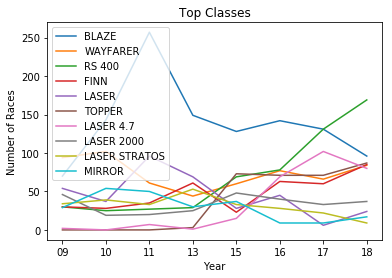

In [7]:
for cls in class_frequencies:
    plt.plot((class_frequencies[cls]), label=cls)
    
plt.legend(class_frequencies.keys())
plt.xlabel('Year')
plt.xticks(np.arange(8), ['09', '10', '11', '13', '15', '16', '17', '18'])
plt.ylabel('Number of Races')
plt.title('Top Classes')